### Programa de Pós-Graduação em Ciência da Computação - CEFET/RJ
## Trabalho 1 - Aprendizado de Máquina

#### Aluna: Rebecca Pontes Salles, Professor: Eduardo Bezerra, Data: 02/10/2017

### Introdução

O seguinte relatório apresenta o desenvolvimento do primeiro trabalho prático da disciplina de Aprendizado de Máquina do curso de Mestrado em Ciência da Computação do CEFET/RJ. Este trabalho envolveu a implementação dos métodos de regressão linear com uma ou várias variáveis, assim como a regressã logística, utilizando a linguagem Python. Dados foram fornecidos como exemplo para aplicação dos códigos produzidos. A seguir é apresentado o código utilizado durante o trabalho para importação dos dados. (Atenção deve ser dada ao fato deste código adicionar uma coluna de valores 1 aos dados de maneira a facilitar futuros cálculos de multiplicação de matrizes.)

In [55]:
import numpy as np
import pandas as pd  
import os

#filepath = caminho do arquivo de dados
#names = nomes dados às colunas/variáveis
def importarDados(filepath,names):
    path = os.getcwd() + filepath  
    data = pd.read_csv(path, header=None, names=names)

    # adiciona uma coluna de 1s referente a variavel x0
    data.insert(0, 'Ones', 1)
    
    # separa os conjuntos de dados x (caracteristicas) e y (alvo)
    cols = data.shape[1]  
    x = data.iloc[:,0:cols-1]  
    y = data.iloc[:,cols-1:cols]
    
    # converte os valores em numpy arrays
    x = np.array(x.values)  
    y = np.array(y.values)
    
    return x,y

### Parte 1 - Regressão Linear com uma Variável

A primeira parte do trabalho se referia à análise, implementação e prática do método de regressão linear com uma variável. Para isso, foi utilizado o arquivo __ex1data1.txt__ contendo duas colunas de dados relacionados ao lucro de uma cadeia de _food truck_ que possui diversos filiais em diferentes cidades. A primeira coluna corresponde à população de cada cidade, enquanto que a segunda coluna corresponde ao lucro da filial daquela cidade. 

#### 1.1 - Visualização dos Dados

Como primeira tarefa, foi pedida a implementação de um script em Python para a produção de um _gráfico de dispersão_ para melhor visualização dos dados fornecidos. O script e o gráfico gerado dão apresentados a seguir.

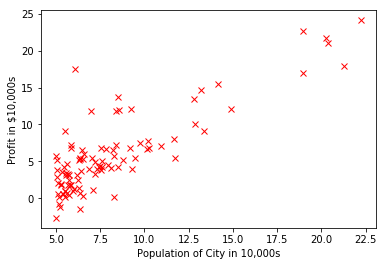

In [9]:
import matplotlib.pyplot as plt

# importa os dados
filepath = "\Trabalho 1\ex1data1.txt"
x,y = importarDados(filepath,["Population","Profit"])

# produz o gráfico de dispersão
plt.plot(x[:,1], y, "x", c="red")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

#### 1.2 - Gradiente Descendente

Em seguida a tarefa definida foi determinar os parâmetros do modelo de regressão linear por meio do algoritmo Gradiente Descendente (versão _batch_).

Para isso primeiro foi criada uma função em Python denominada __computarCusto__ no arquivo __computarCusto.py__.
A função implementa a seguinte equação
![JTheta_multi](JTheta_multi.png)
tendo como entrada a matriz de valores/características _x_, a matriz de única coluna _y_ contendo a variável alvo e a lista de parâmetros _tetha_. A função __computarCusto__ retorna o valor da função de custo da regressão com parâmetros _theta_, assim como o seu vetor gradiente, ou seja, o vetor
![gradiente](gradiente.png)
onde
![gradiente_valores](gradiente_valores.png).
Foi criada também neste arquivo uma função auxiliar __htheta__ para cumputar o valor de
![htheta_multi](htheta_multi.png).

Apesar da primeira parte deste trabalho focar na regressão linear com apenas uma variável, as funções __computarCusto__ e __htheta__ foram desenvolvidas desde o início para o suporte ao caso mais geral de regressão linear com várias variáveis, como pode ser visto pelas equações e códigos a seguir apresentados. Estas funções são portanto reutilizadas daqui por diante até o final da Parte 2 deste trabalho que foca na implementação da regressão linear com várias variáveis.

In [51]:
def computarCusto(x,y,theta):
    x = np.matrix(x)
    y = np.matrix(y)
    theta = np.matrix(theta)
    m = len(x)
    
    JTheta = np.sum( np.power((htheta(x,theta) - y),2) ) / (2.0*m)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    for j in range(parameters):
        grad[j] = np.sum( np.multiply((htheta(x,theta) - y), x[:,j]) ) / m

    return JTheta, grad

def htheta(x,theta):
    return x * theta.T

A corretude destas funções foram verificadas no caso da regressão linear com um variável executando-as com todos os parâmetros theta iguais a zero ([0,0]). Assim como esperado, a função __computarCusto__ gerou o valor 32.072733877455676 para a função de custo da regressão.

In [12]:
computarCusto(x,y,[0,0])

(32.072733877455676, array([ -5.83913505, -65.32884975]))

O próximo passo foi a implementação do algoritmo Gradiente Descendente (GD) propriamente dito. A implementação do algoritmo, feita na função __gd__ no arquivo de nome __gduni.py__, faz chamadas apropriadas à função __computarCusto__ de modo a obter os valores da função de custo e o vetor gradiente. A função implementa o seguinte algoritmo
![gd_gradiente](gd_gradiente.png)
que pode ser simplificado como 
![GD_multi](GD_multi.png)
com
![x0](x0.png).

Esta função __gd__ tem como entrada a matriz de valores/características _x_, a matriz de única coluna _y_ contendo a variável alvo, a lista de parâmetros iniciais _tetha_ e o valor da taxa de aprendizado _alpha_. O retorno da função é a tupla com o vetor de parâmetros _theta_ otimizados, o valor da função de custo (J(θ)) calculado com estes parâmetros, e uma variável booleana que indica a convergência ou não do algoritmo.

Assim como para as funções anteriores, a função __gd__ foi desenvolvida para o suporte ao caso mais geral de regressão linear com várias variáveis, sendo portanto reutilizada até o final da Parte 2 deste trabalho.

In [15]:
def gd(x,y,theta,alpha):
    maxiterations = 100000
    precision = 0.00001
    converged = False
    
    iteration = 0
    
    Jtheta, grad = computarCusto(x,y,theta)
    
    while not converged and iteration < maxiterations:
        iteration += 1
        for j in range(len(theta)):
            theta[j] = theta[j] - alpha * grad[j]
        
        new_Jtheta, new_grad = computarCusto(x,y,theta)
        step = Jtheta - new_Jtheta
        Jtheta, grad = new_Jtheta, new_grad
        
        if step > 0 and step <= precision:
            converged = True
    
    return theta,Jtheta,converged,iteration

A corretude do algortimo GD implementado foi testada com a aplicação aos dados em __ex1data1.txt__. Todos os parâmetros no vetor _theta_ foram iniciados com o valor 0 (zero), e para a taxa de aprendizado _alpha_ foi atribuído o valor 0.01.

Durante a execução do algoritmo GD, não houve crescimento nos valores do gradiente calculados e o valor da função de custo convergiu com 1734 iterações.

O código em Python e o resultado desta aplicação podem ser vistos a seguir. É apresentado também uma script para visualizar a reta correspondente aos parâmetros determinados pelo GD implementado.

GD converged: True, Iterations: 1734


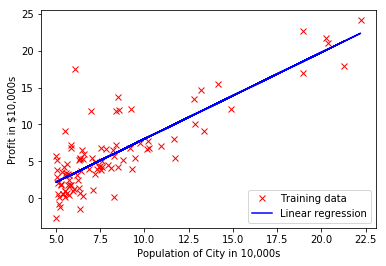

In [32]:
theta = np.zeros(2)
alpha = 0.01

theta,Jtheta,converged,iterations = gd(x,y,theta,alpha)

print("GD converged: " + str(converged) + ", Iterations: " + str(iterations))

train, = plt.plot(x[:,1], y, "x", c="red", label="Training data")
reg, = plt.plot(x[:,1],htheta(x,np.matrix(theta)), 'k' ,c="blue", label="Linear regression")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(handles=[train, reg], loc='lower right')
plt.show()

A próxima tarefa da primeira parte do trabalho, foi usar o modelo de regressão linear produzido para predizer o lucro (_y_) em regiões com populações de 35 mil e 70 mil habitantes. Tendo em vista que os valores da característica de tamanho da população das cidades contida em _x_ segue a unidade de 10 mil, devemos fazer uma previsão para os valores iguais a 3.5 e 7.0, respectivamente. A seguir pode ser visto o código (em Python) para realizar essa previsão, assim como os valores correspondentes do lucro para cada uma destas duas cidades. 

In [31]:
# já que o dataset está em unidades de 10 mil, os valores de 35 mil e 70 mil
# habitantes são representados por 3.5 and 7.0
test_set = np.array(np.matrix([[1.0,3.5],[1.0,7.0]]))
# multiplica-se o valor previsto por 10 mil pela mesma razão
pred = htheta(test_set,np.matrix(theta)) * 10000

print "Lucro para cidade com 35 mil habitantes: $" + str(np.float(pred[0])) + "\nLucro para cidade com 70 mil habitantes: $" + str(np.float(pred[1]))

Lucro para cidade com 35 mil habitantes: $3926.93650008
Lucro para cidade com 70 mil habitantes: $45071.1045144


#### 1.3 - Visualização de J(θ)

Como última tarefa da primeira parte do trabalho, foram produzidos dois gráficos para melhor entendimento da função de custo. Os valores da função de custo J(θ) foram plotados sobre uma grade bidimensional de valores de θ0 e de θ1.  

O código implementado utiliza a função __computarCusto__ e gera um array bidimensional de valores de J(θ) dados diferentes valores de θ0 e de θ1. Os valores de θ0 gerados estam no intervalo [-10,+10] e os valores de θ1, no intervalo [-1,+4], sendo utilizado um incremento de 0.01 na geração deste valores.

A seguir apresenta-se o código para a produção de um gráfico de curvas de contorno e um gráfico da superfície correspondentes a J(θ).

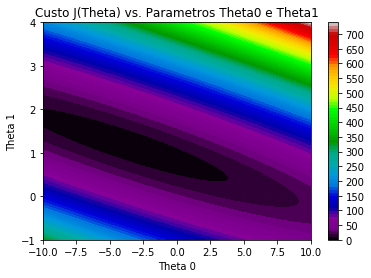

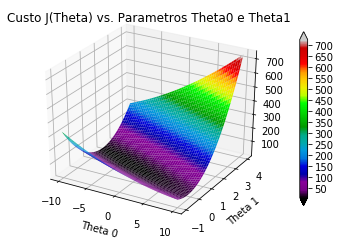

In [33]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# gera valores de theta0 e theta1
theta0 = np.arange(-10, 10.01, 0.01)
theta1 = np.arange(-1, 4.01, 0.01)

# produz um array bidimensional de valores de J(θ)
J = [ [computarCusto(x,y,[t0,t1])[0] for t0 in theta0] for t1 in theta1]

theta0, theta1 = np.meshgrid(theta0, theta1)

lvls = np.arange(0, 750, 10)
colorbar_ticks = np.arange(0, 800, 50)
CS = plt.contourf(theta0, theta1, J, levels=lvls, cmap=cm.spectral)
plt.colorbar(CS, shrink=1, extend='both', ticks=colorbar_ticks)
plt.title("Custo J(Theta) vs. Parametros Theta0 e Theta1")
plt.xlabel("Theta 0")
plt.ylabel("Theta 1")
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(theta0, theta1, J, cmap=cm.spectral)
plt.colorbar(surf, shrink=0.8, extend='both', ticks=colorbar_ticks)
plt.title("Custo J(Theta) vs. Parametros Theta0 e Theta1")
plt.xlabel("Theta 0")
plt.ylabel("Theta 1")
plt.show()

### Parte 2 - Regressão Linear com Múltiplas Variáveis

A segunda parte do trabalho se refere à implementação e aplicação do método de regressão linear com múltiplas variáveis. Para isso, foi utilizado o arquivo __ex1data2.txt__ contendo três colunas de dados relacionados ao preço de venda de imóveis. A primeira coluna corresponde ao tamanho do imóvel (em pés quadrados), a segunda coluna corresponde à quantidade de dormitórios no imóvel em questão e a terceira coluna corresponde ao preço do imóvel.

#### 2.1 - Normalização das características

Já que nos valores do conjunto de dados fornecido, os tamanhos dos imóveis são aproximadamente 1000 vezes maiores que as quantidades encontradas na coluna de quantidade de dormitórios. A próxima tarefa desta parte do trabalho foi implementar uma função denominada __normalizarCaracteristica__ no arquivo __normalizarCaracteristica.py__. Esta função tem como entrada a matriz de características _x_ e tem o propósito de normalizar cada característica em _x_ aplicando-se a transformação _z-score_ observada na equação a seguir.
![normalizacao_z-score](normalizacao_z-score.png)

Essa função funciona com conjuntos de dados de variados tamanhos (qualquer quantidade de características / exemplos) e retorna a matriz de características _x_norm_, análoga a _x_, porém com características normalizadas, e a lista _p_norm_ contendo dicionários com os parâmetros de média e desvio padrão utilizados na normalização de cada característica de _x_. O código desta função pode ser visto a seguir.

In [52]:
def normalizarCaracteristica(x):
    x = x.T
    x_norm = [ (xi - np.mean(xi))/np.std(xi) if np.std(xi)!= 0 else xi for xi in x]
    x_norm = np.array(np.matrix(x_norm).T)
    par_norm = [ {'mean':np.mean(xi),'std':np.std(xi)} for xi in x]
    
    return x_norm, par_norm

#### 2.2 - Gradiente descendente

O próximo passo desta parte do trabalho seria implementar a função de custo e o algoritmo GD para regressão linear com múltiplas variáveis. Entretanto, as funções geradas na parte anterior deste trabalho já provêem suporte a múltiplas variáveis e a qualquer número de características, estando bem vetorizadas, e são portanto reutilizadas. Com isso, os códigos das funções __htheta__, __computarCusto__, e __gd__ foram copiados para os arquivos __computarCustoMulti.py__ e __gdmulti.py__.

A seguir é apresentada uma aplicação das funções desta parte do trabalho ao conjunto de dados presente em __ex1data2.txt__

In [54]:
filepath = "\Trabalho 1\ex1data2.txt"
x,y = importarDados(filepath,["Size","Dorms","Price"])

theta = np.zeros(3)
alpha = 0.01

x_norm,par_norm = normalizarCaracteristica(x)

theta,Jtheta,converged,iterations = gd(x_norm,y,theta,alpha)
print("GD converged: " + str(converged) + ", Iterations: " + str(iterations))

GD converged: True, Iterations: 3163


### Parte 3 - Regressão Logística

A terceira parte do trabalho se refere à implementação e aplicação do método de regressão logística. Em particular, o objetivo desta parte do trabalho é criar um classificador para predizer se um estudante será admitido em uma universidade, com base nos resultados de duas avaliações. Para isso, foi utilizado o arquivo __ex2data1.txt__ contendo dados relacionados ao desempenho e admissão de estudantes em uma universidade. Neste arquivo estão disponíveis dados históricos acerca de realizações passadas
dessas avaliações, e esses dados podem ser usados como conjunto de treinamento. Para cada exemplo desse conjunto de treinamento, temos as notas das duas avaliações e a decisão acerca do candidato (aprovado ou reprovado, 1 ou 0).

A tarefa principal desta parte é portanto construir um modelo de classificação que provê uma estimativa da probabilidade de admissão de um candidato, com base nas notas que ele obteve nas duas avaliações.

#### 3.1 - Visualização dos dados

A primeira tarefa desta parte do trabalho, foi importar o arquivo com o conjunto de treinamento e produzir um gráfico dos pontos de dados. A seguir é apresentado o código usado para produzir o gráfico do conjunto de treinamento representando as classes de estudantes admitidos e reprovados, assim como o gráfico resultante. 

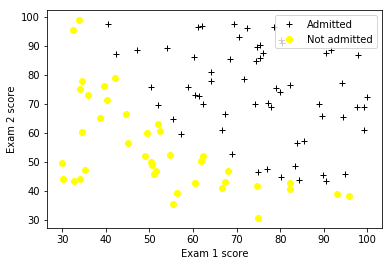

In [39]:
filepath = "\Trabalho 1\ex2data1.txt"
x,y = importarDados(filepath,['Exam 1', 'Exam 2', 'Admitted'])

# subconjunto de dados de estudantes admitidos
x_a = [xi[np.where(y == 1)[0]] for xi in x.T]
# subconjunto de dados de estudantes não admitidos
x_na = [xi[np.where(y == 0)[0]] for xi in x.T]

adm, = plt.plot(x_a[1], x_a[2], "+" ,c="black", label="Admitted")
nadm, = plt.plot(x_na[1], x_na[2], "o", c="yellow", label="Not admitted")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(handles=[adm, nadm], loc='upper right')
plt.show()

#### 3.2 - Implementação

#### 3.2.1 - Função sigmoide

Como primeiro passo para criação do classificador, foi implementada em Python a função __sigmoide__ no arquivo __sigmoide.py__. A função calcula o valor da função sigmoide dado um valor, vetor ou uma matriz númerica, estando portanto vetorizada, aplicando a função sigmoide a cada componente. A função sigmoide implementa a seguinte equação
![sigmoide](sigmoide.png)
e o seu código se encontra a seguir.

In [40]:
def sigmoide(z):
    return 1.0 / (1 + np.exp(-z))

A corretude da função __sigmoide__ foi verificada pela seguinte chamada, onde o parâmetro 0, gerou um valor retornado igual a 0.5, enquanto parâmetros muito grandes e positivos (muito grandes negativos) produziram valores muito próximos de 1 (0).

In [42]:
sigmoide(np.array([0,100,-100]))

array([  5.00000000e-01,   1.00000000e+00,   3.72007598e-44])

#### 3.2.2 - Função de custo e gradiente

O próximo passo para a regressão logística foi implementar a função de custo. Esta função é também denominada __computarCusto__ e também tem uma função auxiliar __htheta__, porém estas foram implementadas no arquivo __funcaoCustoRegressaoLogistica.py__.

As funções __computarCusto__ e __htheta__ desta parte do trabalho são análogas às produzidas na primeira parte do trabalho, entretanto a diferença se encontra na função de custo implementada que segue a seguinte equação
![JTheta_reglog](JTheta_reglog.png)
e na função __htheta__ que cumputa o valor de
![htheta_reglog](htheta_reglog.png).

Os códigos destas funções atualizadas podem ser vistos a seguir.

In [46]:
def computarCusto(x,y,theta):
    x = np.matrix(x)
    y = np.matrix(y)
    theta = np.matrix(theta)
    m = len(x)
    
    first_term = np.multiply(-y, np.log(htheta(x,theta)))
    second_term = np.multiply((1 - y), np.log(1 - htheta(x,theta)))
    
    JTheta = np.sum(first_term - second_term) / m
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    for j in range(parameters):
        grad[j] = np.sum( np.multiply((htheta(x,theta) - y), x[:,j]) ) / m
        
    return JTheta, grad

def htheta(x,theta):
    return sigmoide( x * theta.T )

A corretude das funções foi verficada através da chamada a seguir cujo resultado da função de custo produzido foi aproximadamente 0.693, como esperado.

In [47]:
theta = np.zeros(3)
computarCusto(x,y,theta)[0]

0.69314718055994529

#### 3.2.3 - Aprendizado dos parâmetros

Nessa parte a tarefa foi implementar uma função em Python para encontrar o vetor θ que minimiza a função de custo J(θ). Ou seja, a tarefa foi implementar o algoritmo GD para a regressão logística utilizando a função __computarCusto__ implementada previamente nesta parte do trabalho. A função __gd__ implementada nesta parte é análoga à apresentada na primeira parte do trabalho, seguindo o algoritmo
![gd_gradiente](gd_gradiente.png)
, a única diferença de implementação é a chamada a nova função __computarCusto__ atualizada.

#### 3.2.4 - Aprendizado dos parâmetros

Após o aprendizado dos parâmetros, a próxima tarefa foi usar o modelo correspondente para predizer se um candidato qualquer será aprovado. 
Para um candidato com notas 45 e 85 na primeira e segunda avaliações, respectivamente, a princípio era esperado que ele fosse aprovado com probabilidade 0.776. O algoritmo implementado, entretanto, retornou que o candidato teria uma probabilidade de 0.874 de aprovação neste caso.

A diferença no valor de probabilidade deve-se a um valor zero produzido no trecho _np.log(1 - htheta(x,theta))_ na função __computarCusto__ o que traz dificuldades ao algoritmo ao se aplicar a função _log_. Entretanto, o algoritmo GD conseguiu atingir a convergência no valor da função de custo J(θ), como pode ser visto no código a seguir. 

In [49]:
theta = np.zeros(3)
alpha = 0.01

theta,Jtheta,converged,iterations = gd(x,y,theta,alpha)
print("GD converged: " + str(converged) + ", Iterations: " + str(iterations))

p_test = htheta(np.matrix(np.array([1.0,45.,85.])),np.matrix(theta))
print 'Probabilidade de aprovacao para notas 45 e 85 = {0}%'.format(np.float(p_test))

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


GD converged: True, Iterations: 77324
Probabilidade de aprovacao para notas 45 e 85 = 0.874880440605%


Outro modo de avaliar a qualidade dos parâmetros retornados pelo algoritmo GD implementado foi verificar o quão bem o modelo aprendido prediz os pontos de dados do conjunto de treinamento. Para isso, foi implementada uma função denominada __predizer__. Essa função produz os valores 0 ou 1, dados exemplos do conjunto de treinamento e o vetor de parâmetros θ. Essa função foi usada para produzir a porcentagem de acertos do classificador produzido sobre o conjunto de treinamento.

O resultado dessa implementação pode ser visto a seguir, onde o índice de acertos do classificador implementado nessa última parte do trabalho foi de 91%, o que é um índice relativamente alto de acertos. Entretanto, deve-se sempre dar atenção a possibilidade de sobreajuste.

In [50]:
def predizer(example, theta):
    example = np.matrix(example)
    theta = np.matrix(theta)
    probability = htheta(example,theta)
    return [1 if p >= 0.5 else 0 for p in probability]

def acertos(x, theta):
    predictions = predizer(x, theta)  
    correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
    accuracy = (sum(map(int, correct)) % len(correct))
    return accuracy
    
print 'Porcentagem de acertos = {0}%'.format(acertos(x, theta))

Porcentagem de acertos = 91%
